Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
[ 4.51672053e+01 -1.12347797e+02  1.07441676e+02 -4.65058930e+01
  8.01953043e+00 -1.28129347e-02 -8.21150915e-02  3.98670004e-04
 -1.92613859e-04]


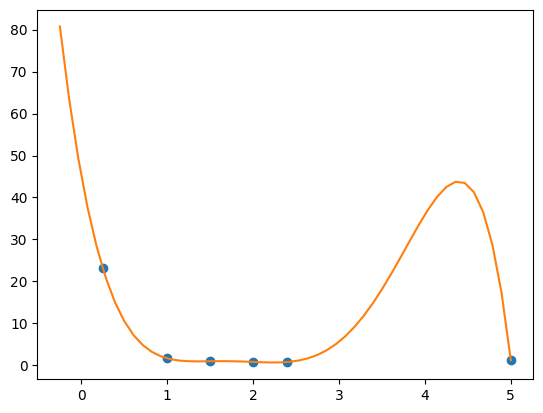

In [2]:
%pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

def plot_difference_of_squares(x, y, grade):
    """
    Esta función ajusta un polinomio de grado 'grade' a los datos (x, y)
    utilizando el método de mínimos cuadrados y luego grafica los resultados.

    Parámetros:
    x : numpy.ndarray
        Array de valores x.
    y : numpy.ndarray
        Array de valores y correspondientes a x.
    grade : int
        Grado del polinomio a ajustar.

    Salida:
    Gráfico que muestra los datos originales y el polinomio ajustado.
    """
    Ax = np.array([x**i for i in range(grade + 1)])
    Am = np.dot(Ax, np.transpose(Ax))
    Aom = np.dot(y ,np.transpose(Ax))
    cG = np.linalg.solve(Am, Aom)
    print(cG)
    plt.plot(x, y, 'o')
    x0 = np.linspace(x[0] - 0.5, x[len(x)-1])
    plt.plot(x0, sum(cG[i] * x0**i for i in range(len(cG))))
    plt.show()

def main():
    """
    Función principal que define los datos y llama a plot_difference_of_squares
    para realizar el ajuste y la gráfica.
    """
    x = np.array([0.25, 1, 1.5, 2, 2.4, 5])
    y = np.array([23.1 ,1.68 ,1 ,0.84 ,0.826 ,1.2576])
    plot_difference_of_squares(x, y, 8)

if __name__ == '__main__':
    main()


# Aproximación de Cuadrados Mínimos mediante Álgebra Lineal

Este notebook demuestra cómo ajustar un polinomio a un conjunto de datos utilizando el método de mínimos cuadrados y álgebra lineal.

## Importar Bibliotecas

```python
import numpy as np
import matplotlib.pyplot as plt
```

## Fundamento Matemático

La idea detrás del método de mínimos cuadrados es encontrar los coeficientes
$( c_0, c_1, ..., c_n )$ que minimizan la suma de los cuadrados de las diferencias entre los valores observados $( y )$ y los valores predichos por el polinomio.

$$
S = \sum_{i=1}^{m} (y_i - P(x_i))^2
$$


Donde $( P(x) )$ es un polinomio de grado $( n )$ definido como:

$$
P(x) = c_0 + c_1 x + c_2 x^2 + ... + c_n x^n
$$



Utilizamos álgebra lineal para resolver este problema como un sistema de ecuaciones lineales de la forma $( A^T A c = A^T y )$, donde $( A )$ es la matriz de diseño y $( c )$ es el vector de coeficientes.

## Definir la Función de Ajuste

La función `plot_difference_of_squares` toma un conjunto de datos `x, y` y un grado `grade` para el polinomio. Luego ajusta un polinomio de ese grado a los datos y grafica tanto los datos como el polinomio ajustado.

```python
def plot_difference_of_squares(x, y, grade):
    """
    Esta función ajusta un polinomio de grado 'grade' a los datos (x, y)
    utilizando el método de mínimos cuadrados y luego grafica los resultados.
    """
    # ... (código)
```

## Función Principal

La función `main` define los datos `x` y `y` y llama a `plot_difference_of_squares`.

```python
def main():
    """
    Función principal que define los datos y llama a plot_difference_of_squares
    para realizar el ajuste y la gráfica.
    """
    # ... (código)
```

## Ejecución

Para ejecutar todo el código, simplemente corremos la función `main`.

```python
if __name__ == '__main__':
    main()
```


```python
if __name__ == '__main__':
    main()
```
